In [1]:
import shap

import pandas as pd
import numpy as np

from sklearn import ensemble

In [2]:
# For converting textual categories to integer labels 
from sklearn.preprocessing import LabelEncoder

# for creating train test split
from sklearn.model_selection import train_test_split
# reading the titanic data
df = pd.read_csv('data/data.csv')
# data preparation
df.fillna(0,inplace=True)

Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:  
X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.  
X2: Gender (1 = male; 2 = female).  
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).  
X4: Marital status (1 = married; 2 = single; 3 = others).  
X5: Age (year).  
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.  
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.  
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.  

In [3]:
label_encoder = LabelEncoder()

categoricals = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

for name in categoricals:
    df[name+'_label'] = label_encoder.fit_transform(df[name])
    df = df.drop(name, axis=1)

In [4]:
y_col = ['default payment next month']
# Create feature list
all_features = ['SEX_label', 'EDUCATION_label', 'MARRIAGE_label',
        'PAY_0_label', 'PAY_2_label', 'PAY_3_label',
       'PAY_4_label', 'PAY_5_label', 'PAY_6_label',
        'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
               ]

categorical_features = ['SEX_label', 'EDUCATION_label',
       'MARRIAGE_label', 'PAY_0_label', 'PAY_2_label', 'PAY_3_label',
       'PAY_4_label', 'PAY_5_label', 'PAY_6_label']
categorical_indices = np.arange(len(categorical_features))
categorical_names = {
    0 : ['Male', 'Female'],
    1 : ['graduate school', 'university', 'high school', 'others'],
    2 : ['married', 'single', 'others'],
    3 : np.arange(10),
    4 : np.arange(10),
    5 : np.arange(10),
    6 : np.arange(10),
    7 : np.arange(10),
    8 : np.arange(10),
    
}

In [5]:
# using train test split to create validation set
X_train, X_test, y_train, y_test = train_test_split(df[all_features],
                                                    df[y_col],
                                                    test_size=0.3)


params = {
    'n_estimators': 100,
    'max_depth': 5,
    'learning_rate': 0.025,
    'loss': 'deviance'
}

model = ensemble.GradientBoostingClassifier(**params)
model.fit(X_train, y_train)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.025, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


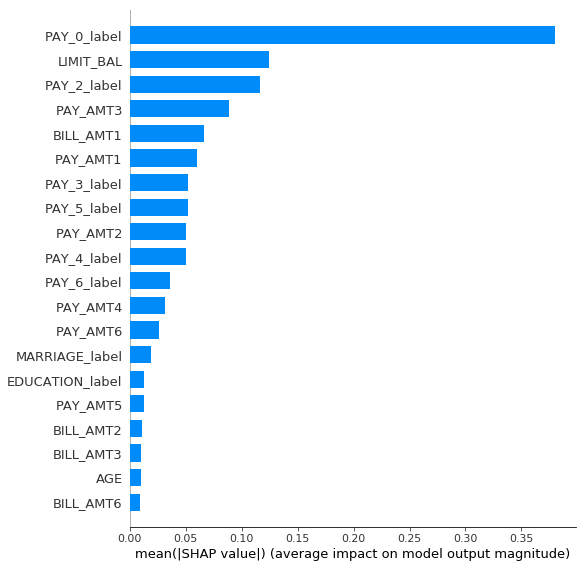

In [6]:
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

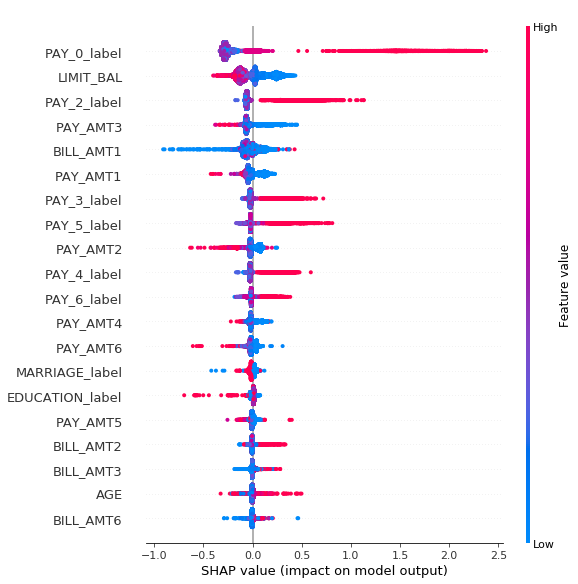

In [7]:
shap.summary_plot(shap_values, X_train)

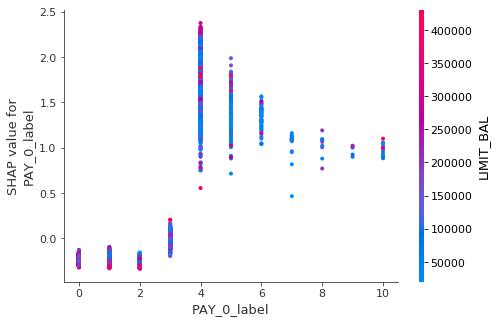

In [8]:
shap.dependence_plot('PAY_0_label', shap_values, X_train)

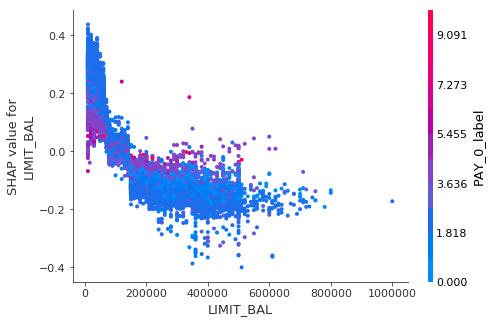

In [11]:
shap.dependence_plot('LIMIT_BAL', shap_values, X_train)

In [23]:
X_test.loc[:,'predict'] = np.round(model.predict_proba(X_test[all_features])[:,0],2)

# Randomly pick some observations
random_picks = np.arange(1,50) # Every 50 rows
new_features = all_features + ['predict']
S = X_test[new_features].iloc[random_picks]

In [24]:
shap.initjs()

# Write in a function
def shap_plot(j):
    explainerModel = shap.TreeExplainer(model)
    shap_values_Model = explainerModel.shap_values(S)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], S.iloc[[j]])
    return(p)

In [26]:
shap_plot(1)